In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')
pd.set_option('display.max_columns', 200)

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
df.shape

(7043, 21)

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [6]:
df = df.drop('customerID', axis=1)

In [7]:
df = df.rename(columns={
    'gender': 'Gender',
    'SeniorCitizen': 'Senior_Citizen',
    'tenure': 'Tenure',
    'PhoneService': 'Phone_Service',
    'MultipleLines': 'Multiple_Lines',
    'InternetService': 'Internet_Service',
    'OnlineSecurity': 'Online_Security',
    'OnlineBackup': 'Online_Backup',
    'DeviceProtection': 'Device_Protection',
    'TechSupport': 'Tech_Support',
    'StreamingTV': 'Streaming_TV',
    'StreamingMovies': 'Streaming_Movies',
    'PaperlessBilling': 'Paperless_Billing',
    'PaymentMethod': 'Payment_Method',
    'MonthlyCharges': 'Monthly_Charges',
    'TotalCharges': 'Total_Charges'
})

In [8]:
df.head()

,Gender,Senior_Citizen,Partner,Dependents,Tenure,Phone_Service,Multiple_Lines,Internet_Service,Online_Security,Online_Backup,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [9]:
df.isna().sum().sum()

np.int64(0)

In [10]:
df.columns

Index(['Gender', 'Senior_Citizen', 'Partner', 'Dependents', 'Tenure',
       'Phone_Service', 'Multiple_Lines', 'Internet_Service',
       'Online_Security', 'Online_Backup', 'Device_Protection', 'Tech_Support',
       'Streaming_TV', 'Streaming_Movies', 'Contract', 'Paperless_Billing',
       'Payment_Method', 'Monthly_Charges', 'Total_Charges', 'Churn'],
      dtype='object')

In [11]:
df.dtypes

,0
Gender,object
Senior_Citizen,int64
Partner,object
Dependents,object
Tenure,int64
Phone_Service,object
Multiple_Lines,object
Internet_Service,object
Online_Security,object
Online_Backup,object


In [12]:
df['Total_Charges'] = pd.to_numeric(df['Total_Charges'], errors='coerce')

df = df.dropna(subset=['Total_Charges'])

df['Total_Charges'] = df['Total_Charges'].astype(float)

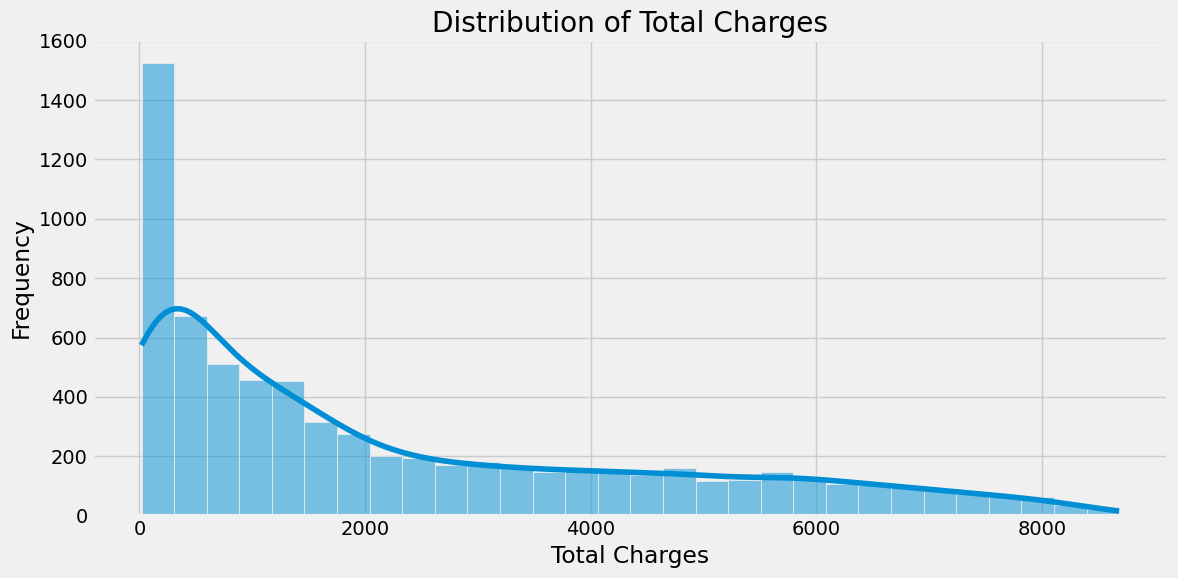

In [13]:
plt.figure(figsize=(12, 6))
sns.histplot(df['Total_Charges'], bins=30, kde=True)
plt.title('Distribution of Total Charges')
plt.xlabel('Total Charges')
plt.ylabel('Frequency')
plt.tight_layout()

plt.show()

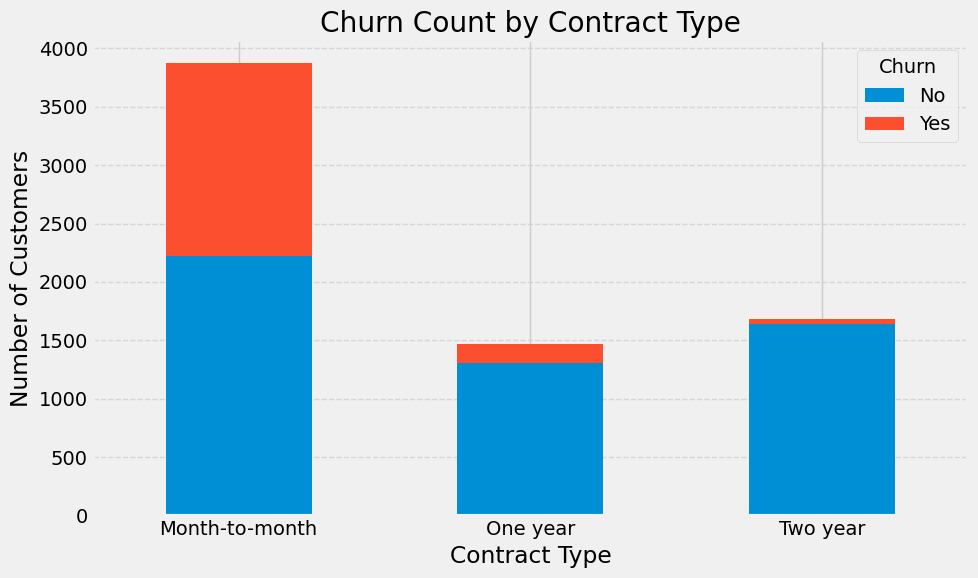

In [14]:
df['Total_Charges'] = pd.to_numeric(df['Total_Charges'], errors='coerce')
df_clean = df.dropna(subset=['Total_Charges'])

contract_churn = df_clean.groupby(['Contract', 'Churn']).size().unstack()

contract_churn.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Churn Count by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [15]:
df.columns

Index(['Gender', 'Senior_Citizen', 'Partner', 'Dependents', 'Tenure',
       'Phone_Service', 'Multiple_Lines', 'Internet_Service',
       'Online_Security', 'Online_Backup', 'Device_Protection', 'Tech_Support',
       'Streaming_TV', 'Streaming_Movies', 'Contract', 'Paperless_Billing',
       'Payment_Method', 'Monthly_Charges', 'Total_Charges', 'Churn'],
      dtype='object')

In [16]:
num_features = ['Tenure', 'Monthly_Charges', 'Total_Charges']

cat_features = ['Gender','Senior_Citizen','Partner','Dependents','Phone_Service','Multiple_Lines',
                'Internet_Service','Online_Security','Online_Backup','Device_Protection','Tech_Support',
                'Streaming_TV', 'Streaming_Movies','Contract','Paperless_Billing','Payment_Method']

target = 'Churn'

In [17]:
X = df[num_features + cat_features]
y = df[target].map({'Yes': 1, 'No': 0})

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

In [18]:
preprocessor = ColumnTransformer([
        ('num', StandardScaler(), num_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_features)
    ])

In [19]:
model = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])

In [20]:
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Tenure', 'Monthly_Charges',
                                                   'Total_Charges']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Gender', 'Senior_Citizen',
                                                   'Partner', 'Dependents',
                                                   'Phone_Service',
                                                   'Multiple_Lines',
                                                   'Internet_Service',
                                                   'Online_Security',
                                                   'Online_Backup',
                                                   'Device_Protection',
                                                   'Tech_Support',
                                                   'Streaming_TV',
                                                   'Streaming_Movies',
                                                   'Contract',
                                                   'Paperless_Billing',
                                                   'Payment_Method'])])),
                ('classifier', LogisticRegression(max_iter=1000))])

In [21]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print(f'Model Accuracy: {accuracy:.2f}')
print('-' * 50)
print(classification_report(y_test, y_pred))

Model Accuracy: 0.81
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1291
           1       0.65      0.58      0.61       467

    accuracy                           0.81      1758
   macro avg       0.75      0.73      0.74      1758
weighted avg       0.80      0.81      0.80      1758



In [22]:
new_customer = pd.DataFrame([{
    'Tenure': 12,
    'Monthly_Charges': 75.35,
    'Total_Charges': 900.00,
    'Gender': 'Female',
    'Senior_Citizen': 0,
    'Partner': 'No',
    'Dependents': 'No',
    'Phone_Service': 'Yes',
    'Multiple_Lines': 'No',
    'Internet_Service': 'Fiber optic',
    'Online_Security': 'No',
    'Online_Backup': 'Yes',
    'Device_Protection': 'No',
    'Tech_Support': 'No',
    'Streaming_TV': 'Yes',
    'Streaming_Movies': 'Yes',
    'Contract': 'Month-to-month',
    'Paperless_Billing': 'Yes',
    'Payment_Method': 'Electronic check'
}])

In [23]:
prediction = model.predict(new_customer)
probability = model.predict_proba(new_customer)

print(f"Prediction: {'Churn' if prediction[0] == 1 else 'No Churn'}")
print(f"Probability of Churn: {probability[0][1]:.2f}")

Prediction: Churn
Probability of Churn: 0.75
